In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(17038, 2)

In [3]:
df.head()

,Time,domain
0,2022-01-17 23:42:02,www.google.com
1,2022-01-17 23:46:09,www.google.com
2,2022-01-17 23:46:22,www.google.com
3,2022-01-17 23:46:28,www.goibibo.com
4,2022-01-17 23:48:38,www.goibibo.com


In [4]:
df.tail()

,Time,domain
17033,2022-04-17 12:43:01,github.com
17034,2022-04-17 12:43:01,github.com
17035,2022-04-17 12:43:16,github.com
17036,2022-04-17 12:44:37,github.com
17037,2022-04-17 13:18:10,docs.google.com


In [5]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [12]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [13]:
df.head()

,Time,domain
0,2022-01-17 23:42:02,www.google.com
1,2022-01-17 23:46:09,www.google.com
2,2022-01-17 23:46:22,www.google.com
3,2022-01-17 23:46:28,www.goibibo.com
4,2022-01-17 23:48:38,www.goibibo.com


In [14]:
df.head()

,Time,domain
0,2022-01-17 23:42:02,www.google.com
1,2022-01-17 23:46:09,www.google.com
2,2022-01-17 23:46:22,www.google.com
3,2022-01-17 23:46:28,www.goibibo.com
4,2022-01-17 23:48:38,www.goibibo.com


In [15]:
df['domain'].value_counts()[:50]

colab.research.google.com           4531
www.google.com                      3234
github.com                          3020
webauth.umbc.edu                    1834
my.umbc.edu                          736
my3.my.umbc.edu                      545
blackboard.umbc.edu                  441
courses.3rdmil.com                   147
fmoviesto.cc                         140
mail.google.com                      139
www.youtube.com                      121
umbc-residence.symplicity.com        118
umbc.webex.com                        75
commerce.cashnet.com                  68
csprd-web.ps.umbc.edu                 62
reslife.umbc.edu                      56
myretrievercare.umbc.edu              55
secure.bge.com                        50
hbsp.harvard.edu                      49
accounts.google.com                   43
web.whatsapp.com                      35
www.bathandbodyworks.com              35
walkeravenueapts.com                  33
stackoverflow.com                     32
professionalprog

<AxesSubplot:>

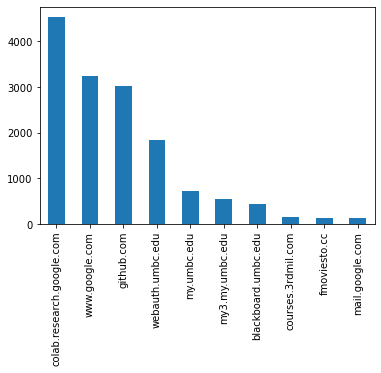

In [16]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')


In [17]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0      222
1       12
2       50
3       31
4       81
5      164
6      220
7      321
8      808
9     1950
10    1418
11     733
12     534
13     847
14    1068
15     668
16     904
17     961
18     754
19    1121
20     678
21    1218
22    1014
23    1261
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

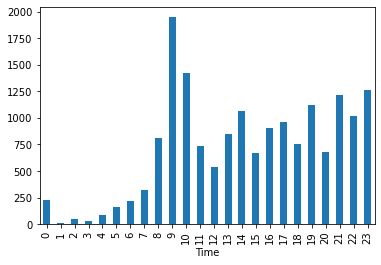

In [18]:
hourly_counts.plot.bar()

In [19]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-01-17 23:42:02,www.google.com,Monday,0
1,2022-01-17 23:46:09,www.google.com,Monday,0
2,2022-01-17 23:46:22,www.google.com,Monday,0
3,2022-01-17 23:46:28,www.goibibo.com,Monday,0
4,2022-01-17 23:48:38,www.goibibo.com,Monday,0


In [20]:
df['Day'].value_counts()

Saturday     3402
Friday       2818
Thursday     2748
Sunday       2556
Wednesday    2511
Monday       1644
Tuesday      1359
Name: Day, dtype: int64

In [21]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted


0    1644
1    1359
2    2511
3    2748
4    2818
5    3402
6    2556
Name: DayIndex, dtype: int64

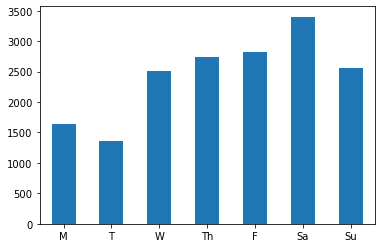

In [22]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [23]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-01-17 23:42:02,www.google.com,Monday,0,False
1,2022-01-17 23:46:09,www.google.com,Monday,0,False
2,2022-01-17 23:46:22,www.google.com,Monday,0,False
3,2022-01-17 23:46:28,www.goibibo.com,Monday,0,False
4,2022-01-17 23:48:38,www.goibibo.com,Monday,0,False


In [24]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]

In [25]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
371,2022-01-22 00:46:15,www.youtube.com,Saturday,5,True
372,2022-01-22 00:48:44,mail.google.com,Saturday,5,True
373,2022-01-22 00:49:10,www.google.com,Saturday,5,True
374,2022-01-22 00:50:38,www.google.com,Saturday,5,True
375,2022-01-22 00:50:43,www.zomato.com,Saturday,5,True


In [26]:
weekday['domain'].value_counts()[:5]

colab.research.google.com    3231
github.com                   1870
www.google.com               1683
webauth.umbc.edu             1256
my.umbc.edu                   534
Name: domain, dtype: int64

In [27]:
weekend['domain'].value_counts()[:5]

www.google.com               1551
colab.research.google.com    1300
github.com                   1150
webauth.umbc.edu              578
my.umbc.edu                   202
Name: domain, dtype: int64

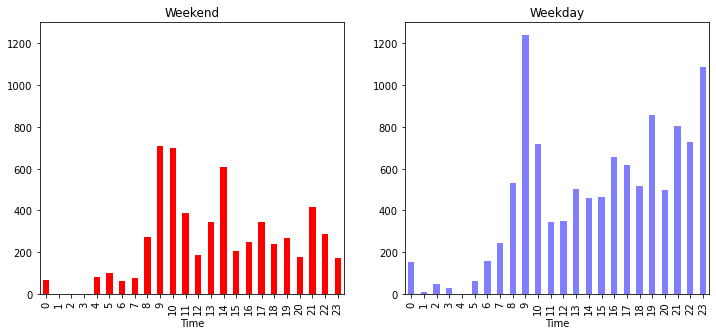

In [28]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()

In [29]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

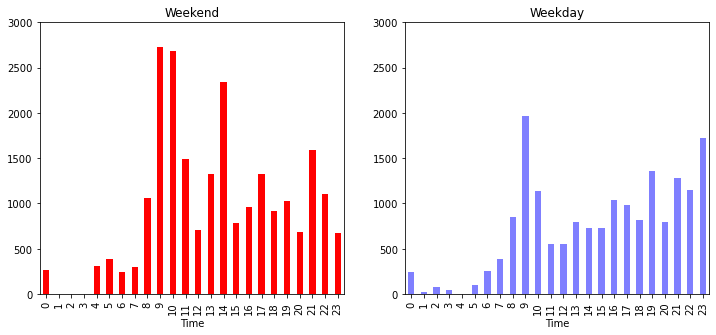

In [30]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 3000]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [31]:
df['domain'].value_counts()[:10]

colab.research.google.com    4531
www.google.com               3234
github.com                   3020
webauth.umbc.edu             1834
my.umbc.edu                   736
my3.my.umbc.edu               545
blackboard.umbc.edu           441
courses.3rdmil.com            147
fmoviesto.cc                  140
mail.google.com               139
Name: domain, dtype: int64

In [32]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [33]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data


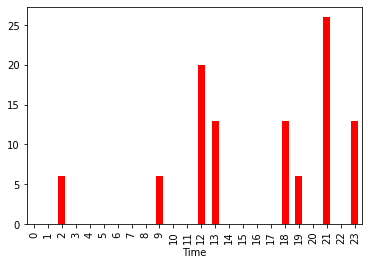

In [34]:
_ = show_domain_stats('instagram.com', 'red')

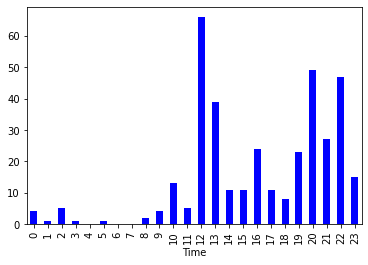

In [35]:
_= show_domain_stats('youtube.com|fmoviesto.cc', 'blue')

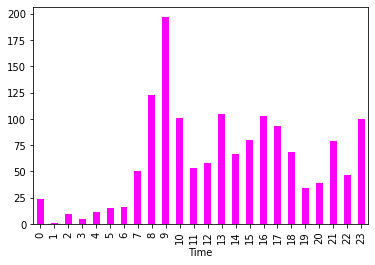

In [36]:
_= show_domain_stats('my.umbc.edu|my3.my.umbc.edu|blackboard.umbc.edu ', 'magenta')

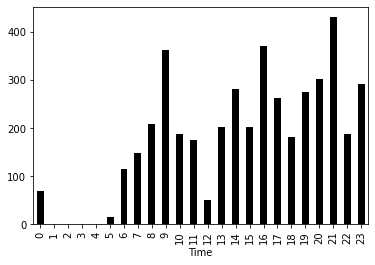

In [37]:
_ = show_domain_stats('github.com', 'black')

## Based on data, what can we tell about this person?
1. Is this a work computer/personal computer?
2. Is he/she employed?
3. What are his/her interests?
4. Anything interesting?

1. This looks like a personal computer.
2. No, It seems he/she is a student based on edu websites.
3. It seems that the interests are limited to learning.
4. Google Colab is being used a lot.